### Abalone Case Study

####  Description

###  Importing Required Liberary

In [327]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")



In [277]:
import pandas as pd

In [278]:
df=pd.read_csv("Abalone case study.csv")

In [279]:
df

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
5      I   0.425     0.300   0.095        0.3515          0.1410   
6      F   0.530     0.415   0.150        0.7775          0.2370   
7      F   0.545     0.425   0.125        0.7680          0.2940   
8      M   0.475     0.370   0.125        0.5095          0.2165   
9      F   0.550     0.440   0.150        0.8945          0.3145   
10     F   0.525     0.380   0.140        0.6065          0.1940   
11     M   0.430     0.350   0.110        0.4060          0.1675   
12     M   0.490     0.380   0.135        0.5415          0.2175   
13     F   0.535     0.405   0.145        0.6845          0.2725   
14     F   0.470     0.355   0.100        0.4755          0.1675   
15     M   0.500     0.400   0.130        0.6645          0.2580   
16     I   0.355     0.280   0.085        0.2905          0.0950   
17     F   0.440     0.340   0.100        0.4510          0.1880   
18     M   0.365     0.295   0.080        0.2555          0.0970   
19     M   0.450     0.320   0.100        0.3810          0.1705   
20     M   0.355     0.280   0.095        0.2455          0.0955   
21     I   0.380     0.275   0.100        0.2255          0.0800   
22     F   0.565     0.440   0.155        0.9395          0.4275   
23     F   0.550     0.415   0.135        0.7635          0.3180   
24     F   0.615     0.480   0.165        1.1615          0.5130   
25     F   0.560     0.440   0.140        0.9285          0.3825   
26     F   0.580     0.450   0.185        0.9955          0.3945   
27     M   0.590     0.445   0.140        0.9310          0.3560   
28     M   0.605     0.475   0.180        0.9365          0.3940   
29     M   0.575     0.425   0.140        0.8635          0.3930   
30     M   0.580     0.470   0.165        0.9975          0.3935   
31     F   0.680     0.560   0.165        1.6390          0.6055   
32     M   0.665     0.525   0.165        1.3380          0.5515   
33     F   0.680     0.550   0.175        1.7980          0.8150   
34     F   0.705     0.550   0.200        1.7095          0.6330   
35     M   0.465     0.355   0.105        0.4795          0.2270   
36     F   0.540     0.475   0.155        1.2170          0.5305   
37     F   0.450     0.355   0.105        0.5225          0.2370   
38     F   0.575     0.445   0.135        0.8830          0.3810   
39     M   0.355     0.290   0.090        0.3275          0.1340   
40     F   0.450     0.335   0.105        0.4250          0.1865   
41     F   0.550     0.425   0.135        0.8515          0.3620   
42     I   0.240     0.175   0.045        0.0700          0.0315   
43     I   0.205     0.150   0.055        0.0420          0.0255   
44     I   0.210     0.150   0.050        0.0420          0.0175   
45     I   0.390     0.295   0.095        0.2030          0.0875   
46     M   0.470     0.370   0.120        0.5795          0.2930   
47     F   0.460     0.375   0.120        0.4605          0.1775   
48     I   0.325     0.245   0.070        0.1610          0.0755   
49     F   0.525     0.425   0.160        0.8355          0.3545   
50     I   0.520     0.410   0.120        0.5950          0.2385   
51     M   0.400     0.320   0.095        0.3030          0.1335   
52     M   0.485     0.360   0.130        0.5415          0.2595   
53     F   0.470     0.360   0.120        0.4775          0.2105   
54     M   0.405     0.310   0.100        0.3850          0.1730   
55     F   0.500     0.400   0.140        0.6615          0.2565   
56     M   0.445     0.350   0.120        0.4425          0.1920   
57     M   0.470     0.385   0.135        0.5895          0.2

In [280]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

####  About the columns

In [281]:
df.shape # Checking the data dimension

(4177, 9)

In [282]:
pd.set_option("display.max_rows",None)

In [283]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [284]:
from sklearn.preprocessing import LabelEncoder

In [285]:
encode=LabelEncoder()
encode.fit_transform(df["Sex"])

array([2, 2, 0, ..., 2, 0, 2])

In [286]:
df["Sex_Newcol"]=encode.fit_transform(df["Sex"])
df.drop("Sex",axis=1,inplace=True)

In [287]:
df.dtypes

Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
Sex_Newcol          int32
dtype: object

Now Every column have int and flot data type

#### Statitsical Summary

In [288]:
df.isnull().sum()

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Sex_Newcol        0
dtype: int64

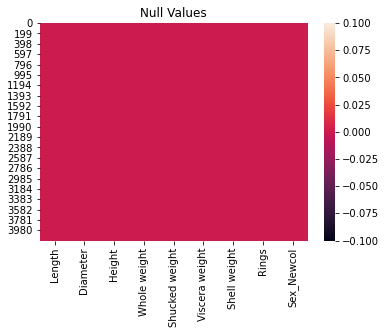

In [289]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

####  EDA

####  Checking Correlation

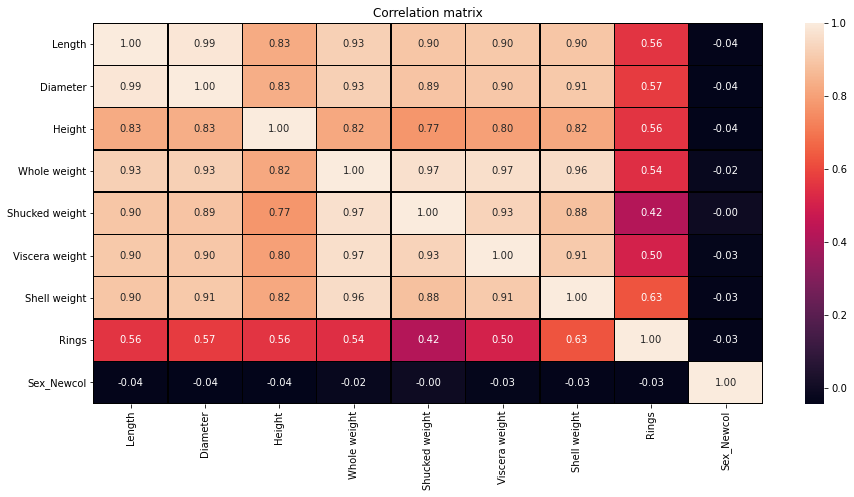

In [290]:
corr_mat=df.corr() # Example of multivarrient analysis
plt.figure(figsize=[15,7])
sns.heatmap(corr_mat,annot=True,linewidths=0.5,linecolor="black",fmt=".2f")
plt.title("Correlation matrix")
plt.show()

In [291]:
corr_matrix=df.corr()
corr_matrix["Rings"].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex_Newcol       -0.034627
Name: Rings, dtype: float64

Text(0.5, 1.0, 'Rings vs Shell weight')

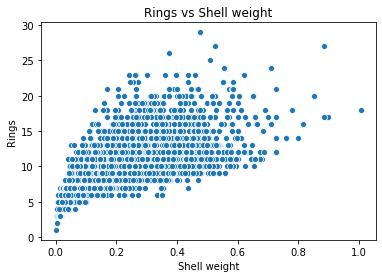

In [292]:
sns.scatterplot(y="Rings",x="Shell weight",data=df) # Example of bilateral varrient analysis
plt.title("Rings vs Shell weight")

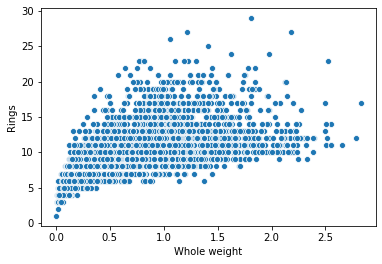

In [293]:
sns.scatterplot(y="Rings",x="Whole weight",data=df)

In [294]:
df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings   Sex_Newcol  
count     4177.000000   4177.000000  4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684     1.052909  
std          0.109614      0.139203     3.224169     0.822240  
min          0.000500      0.001500     1.000000     0.000000  
25%          0.093500      0.130000     8.000000     0.000000  
50%          0.171000      0.234000     9.000000     1.000000  
75%          0.253000      0.329000    11.000000     2.000000  
max          0.760000      1.005000    29.000000     2.000000

###  Outliers Checking

Length                AxesSubplot(0.125,0.71587;0.227941x0.16413)
Diameter           AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Height             AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Whole weight         AxesSubplot(0.125,0.518913;0.227941x0.16413)
Shucked weight    AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Viscera weight    AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Shell weight         AxesSubplot(0.125,0.321957;0.227941x0.16413)
Rings             AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Sex_Newcol        AxesSubplot(0.672059,0.321957;0.227941x0.16413)
dtype: object

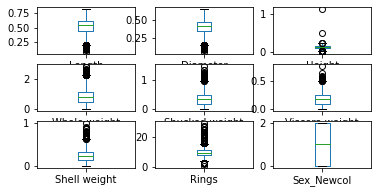

In [295]:
df.plot(kind="box",subplots=True,layout=(4,3))

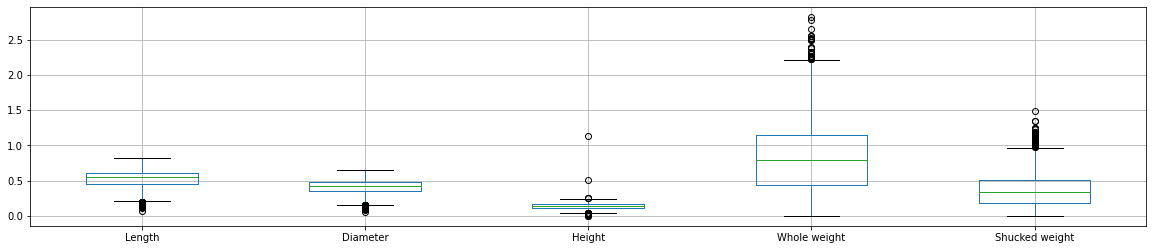

In [296]:
df.iloc[:,0:5].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.50)
plt.show()

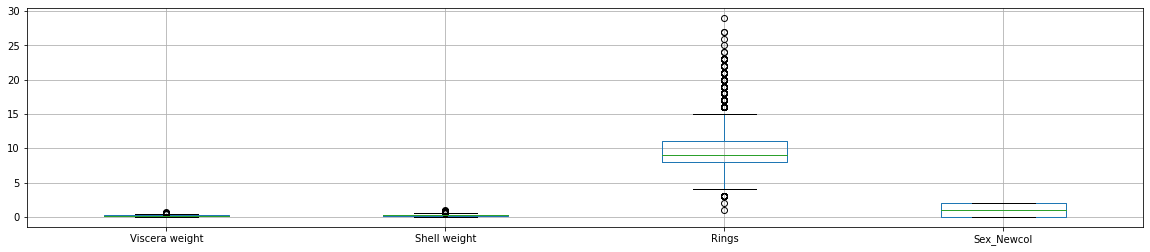

In [297]:
df.iloc[:,5:9].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.50)
plt.show()

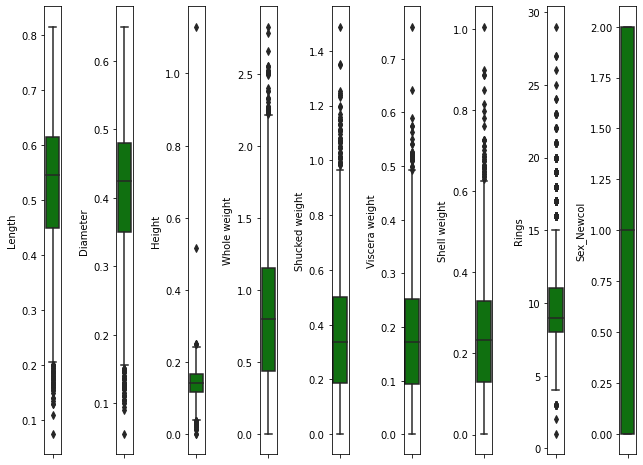

In [298]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color="green",orient="v")
    plt.tight_layout()

#### Removing Outliers

In [299]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z

array([[0.57455813, 0.43214879, 1.06442415, ..., 0.63821689, 1.57154357,
        1.15198011],
       [1.44898585, 1.439929  , 1.18397831, ..., 1.21298732, 0.91001299,
        1.15198011],
       [0.05003309, 0.12213032, 0.10799087, ..., 0.20713907, 0.28962385,
        1.28068972],
       ...,
       [0.6329849 , 0.67640943, 1.56576738, ..., 0.49695471, 0.28962385,
        1.15198011],
       [0.84118198, 0.77718745, 0.25067161, ..., 0.41073914, 0.02057072,
        1.28068972],
       [1.54905203, 1.48263359, 1.32665906, ..., 1.84048058, 0.64095986,
        1.15198011]])

In [300]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [301]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)

In [302]:
q1

Length            0.4500
Diameter          0.3500
Height            0.1150
Whole weight      0.4415
Shucked weight    0.1860
Viscera weight    0.0935
Shell weight      0.1300
Rings             8.0000
Sex_Newcol        0.0000
Name: 0.25, dtype: float64

In [303]:
q3

Length             0.615
Diameter           0.480
Height             0.165
Whole weight       1.153
Shucked weight     0.502
Viscera weight     0.253
Shell weight       0.329
Rings             11.000
Sex_Newcol         2.000
Name: 0.75, dtype: float64

In [304]:
df_new=df[(z<3).all(axis=1)]
df_new

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
5      0.425     0.300   0.095        0.3515          0.1410          0.0775   
7      0.545     0.425   0.125        0.7680          0.2940          0.1495   
8      0.475     0.370   0.125        0.5095          0.2165          0.1125   
9      0.550     0.440   0.150        0.8945          0.3145          0.1510   
10     0.525     0.380   0.140        0.6065          0.1940          0.1475   
11     0.430     0.350   0.110        0.4060          0.1675          0.0810   
12     0.490     0.380   0.135        0.5415          0.2175          0.0950   
13     0.535     0.405   0.145        0.6845          0.2725          0.1710   
14     0.470     0.355   0.100        0.4755          0.1675          0.0805   
15     0.500     0.400   0.130        0.6645          0.2580          0.1330   
16     0.355     0.280   0.085        0.2905          0.0950          0.0395   
17     0.440     0.340   0.100        0.4510          0.1880          0.0870   
18     0.365     0.295   0.080        0.2555          0.0970          0.0430   
19     0.450     0.320   0.100        0.3810          0.1705          0.0750   
20     0.355     0.280   0.095        0.2455          0.0955          0.0620   
21     0.380     0.275   0.100        0.2255          0.0800          0.0490   
22     0.565     0.440   0.155        0.9395          0.4275          0.2140   
23     0.550     0.415   0.135        0.7635          0.3180          0.2100   
24     0.615     0.480   0.165        1.1615          0.5130          0.3010   
25     0.560     0.440   0.140        0.9285          0.3825          0.1880   
26     0.580     0.450   0.185        0.9955          0.3945          0.2720   
27     0.590     0.445   0.140        0.9310          0.3560          0.2340   
28     0.605     0.475   0.180        0.9365          0.3940          0.2190   
29     0.575     0.425   0.140        0.8635          0.3930          0.2270   
30     0.580     0.470   0.165        0.9975          0.3935          0.2420   
31     0.680     0.560   0.165        1.6390          0.6055          0.2805   
32     0.665     0.525   0.165        1.3380          0.5515          0.3575   
33     0.680     0.550   0.175        1.7980          0.8150          0.3925   
34     0.705     0.550   0.200        1.7095          0.6330          0.4115   
35     0.465     0.355   0.105        0.4795          0.2270          0.1240   
36     0.540     0.475   0.155        1.2170          0.5305          0.3075   
37     0.450     0.355   0.105        0.5225          0.2370          0.1165   
38     0.575     0.445   0.135        0.8830          0.3810          0.2035   
39     0.355     0.290   0.090        0.3275          0.1340          0.0860   
40     0.450     0.335   0.105        0.4250          0.1865          0.0910   
41     0.550     0.425   0.135        0.8515          0.3620          0.1960   
42     0.240     0.175   0.045        0.0700          0.0315          0.0235   
43     0.205     0.150   0.055        0.0420          0.0255          0.0150   
44     0.210     0.150   0.050        0.0420          0.0175          0.0125   
45     0.390     0.295   0.095        0.2030          0.0875          0.0450   
46     0.470     0.370   0.120        0.5795          0.2930          0.2270   
47     0.460     0.375   0.120        0.4605          0.1775          0.1100   
48     0.325     0.245   0.070        0.1610          0.0755          0.0255   
49     0.525     0.425   0.160        0.8355          0.3545          0.2135   
50    

In [305]:
df.shape

(4177, 9)

In [306]:
df_new.shape

(4027, 9)

### Checking the Skewness

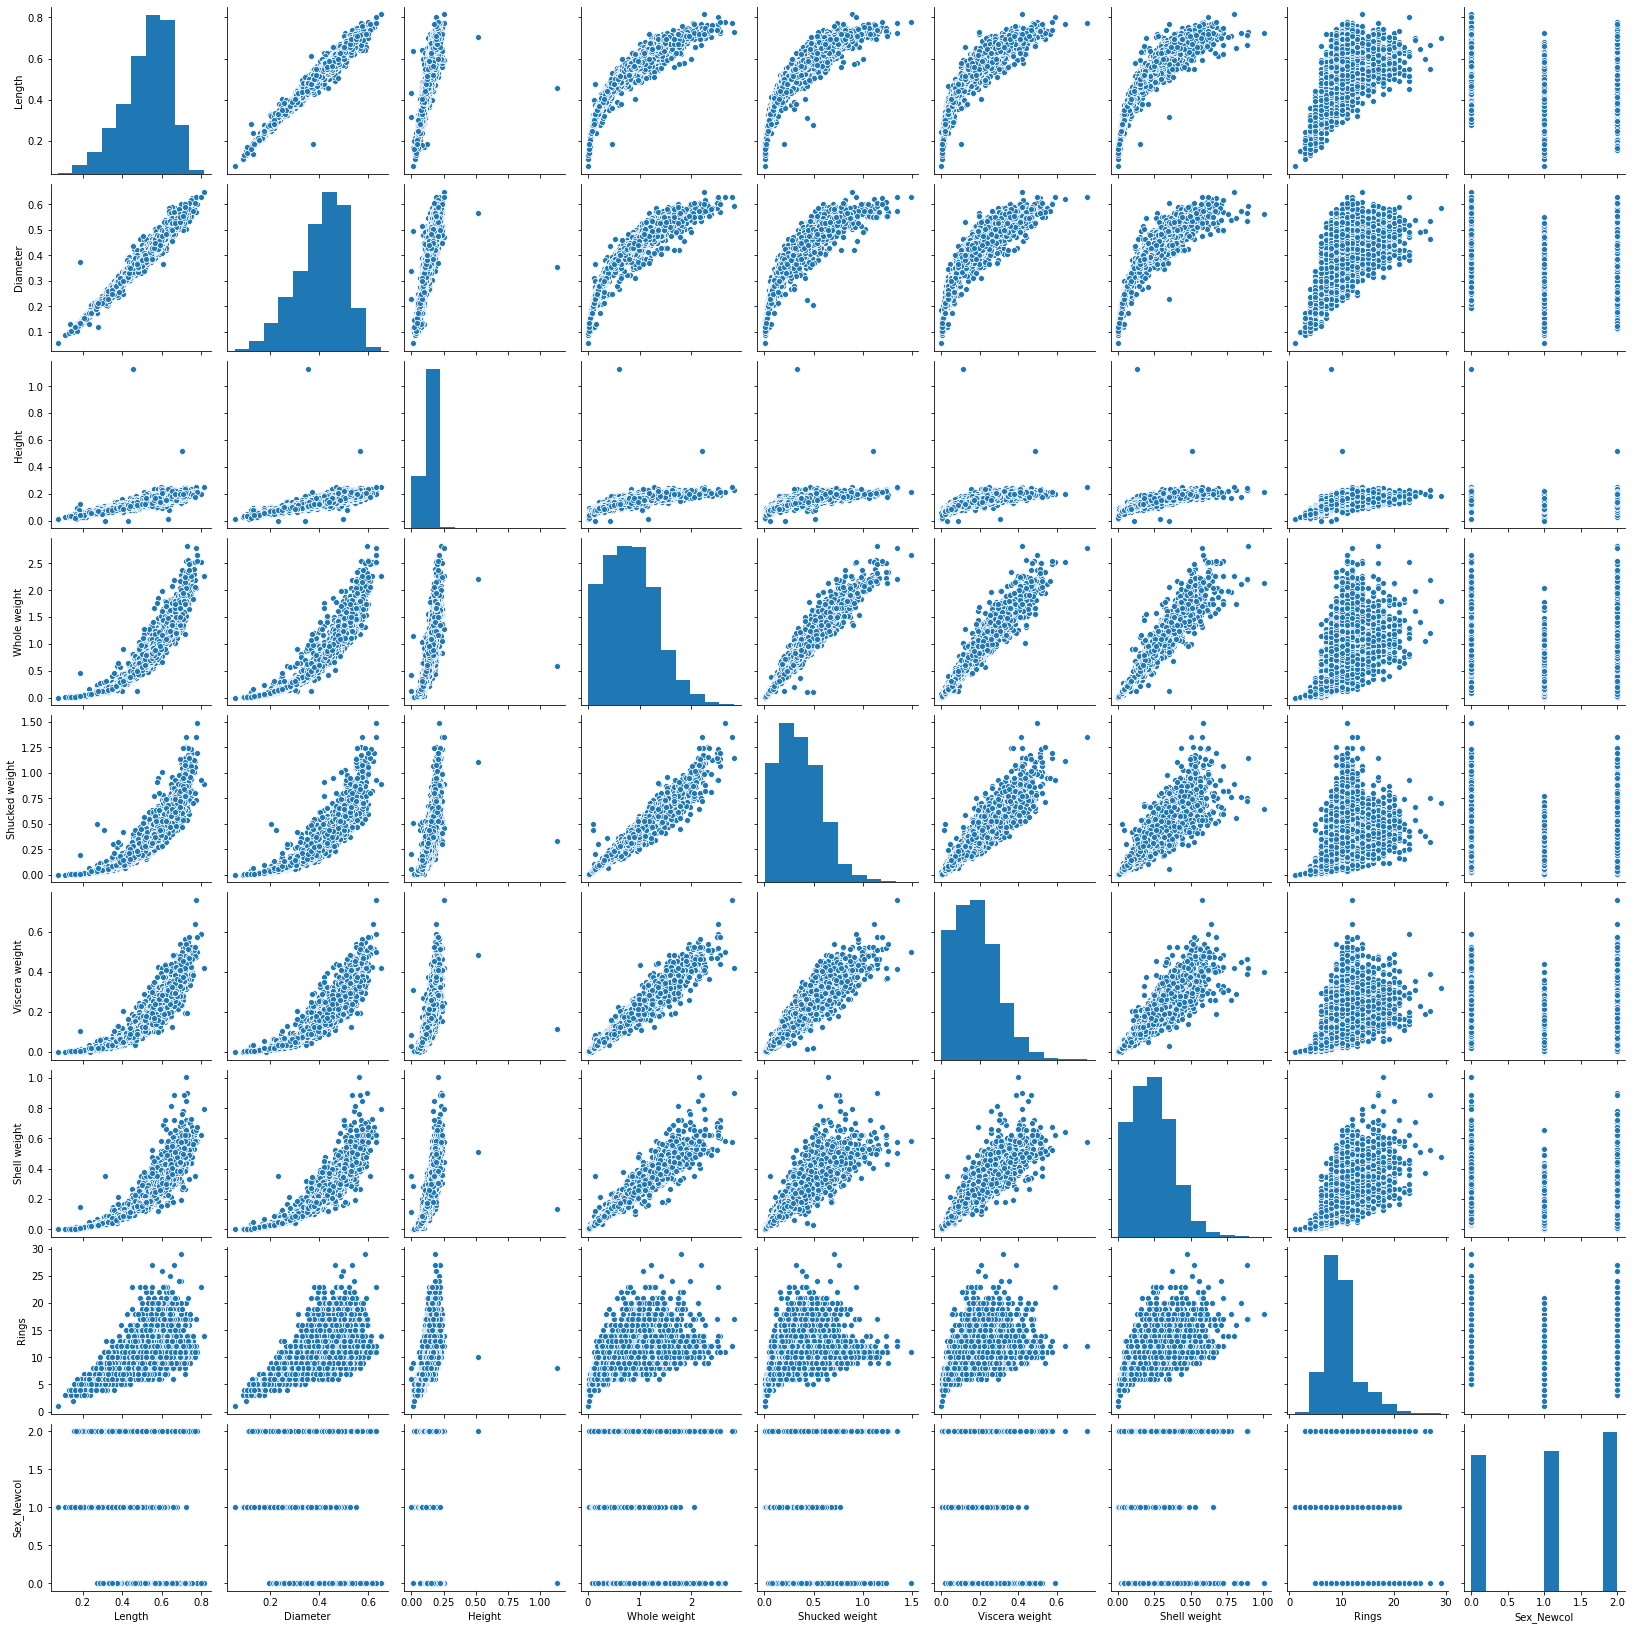

In [146]:
sns.pairplot(df) 


In [307]:
# Splitting the data into the independent and target variable into x and y
x=df.drop("Rings",axis=1)
y=df["Rings"]

In [308]:
x.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Sex_Newcol       -0.098155
dtype: float64

#### Removing the Skewness

In [309]:
from sklearn.preprocessing import power_transform
df_new1=power_transform(x)
df_new1=pd.DataFrame(df_new1,columns=x.columns)

In [310]:
df_new1.skew()

Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
Sex_Newcol       -0.176442
dtype: float64

In [311]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [312]:
x_train.shape

(2798, 8)

In [313]:
y_train.shape

(2798,)

In [314]:
x_test.shape

(1379, 8)

In [315]:
y_test.shape

(1379,)

In [316]:
lm=LinearRegression()


In [317]:
lm.fit(x_train,y_train)

LinearRegression()

In [318]:
pred=lm.predict(x_test)
print("pridct the result",pred)
print("actual rings",y_test)

pridct the result [11.73566406 10.0761398  13.99680036 ...  8.07273277  7.8847054
  7.52664836]
actual rings 866      9
1483     8
599     16
1702     9
670     14
2430    11
1590     7
949      6
4026     7
3668    10
351     22
175      7
807     15
393      9
2881     8
432     18
179     11
308     14
1979    13
2648     9
166     20
1419    12
1377    12
1688    11
1653    10
2283     7
4035    11
4059     8
1641     9
3728    10
4110     9
2792    10
1829     6
690     10
1578     8
990      9
3632     5
238      3
3186     6
907      6
1422    12
3148    12
3237    18
1117     8
3210    12
1421    13
3957    10
1338    10
734     18
149      4
3407     6
270     22
1862     8
465      5
2005     7
3658    10
505     15
2344    21
1912    10
3315     9
865     10
1736    13
1926    11
3409     7
2111     9
1730    11
1057     4
1432     5
1467     7
96       9
1721    10
196     11
2325    10
1769     7
3361     9
2615    12
314     23
2266    14
150     15
1114     9
3277    15


In [330]:
print("error")
print("Mean absolute error :", mean_absolute_error(y_test,pred))
print ("Mean squared error :",mean_squared_error(y_test,pred))
print("Actuall price",y_test)

error
Mean absolute error : 1.6316718551295466
Mean squared error : 4.9493987955235115
Actuall price 866      9
1483     8
599     16
1702     9
670     14
2430    11
1590     7
949      6
4026     7
3668    10
351     22
175      7
807     15
393      9
2881     8
432     18
179     11
308     14
1979    13
2648     9
166     20
1419    12
1377    12
1688    11
1653    10
2283     7
4035    11
4059     8
1641     9
3728    10
4110     9
2792    10
1829     6
690     10
1578     8
990      9
3632     5
238      3
3186     6
907      6
1422    12
3148    12
3237    18
1117     8
3210    12
1421    13
3957    10
1338    10
734     18
149      4
3407     6
270     22
1862     8
465      5
2005     7
3658    10
505     15
2344    21
1912    10
3315     9
865     10
1736    13
1926    11
3409     7
2111     9
1730    11
1057     4
1432     5
1467     7
96       9
1721    10
196     11
2325    10
1769     7
3361     9
2615    12
314     23
2266    14
150     15
1114     9
3277    15
3282    